In [46]:
!conda install -c conda-forge xgboost --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/TomasFox/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    py-xgboost-0.82            |   py27h6de7cb9_0          68 KB  conda-forge
    xgboost-0.82               |   py27h6de7cb9_0           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          77 KB

The following packages will be UPDATED:

  libxgboost          pkgs/main::libxgboost-0.80-h0a44026_0 --> conda-forge::libxgboost-0.82-h6de7cb9_0
  py-xgboost         pkgs/main::py-xgboost-0.80-py27h0a440~ --> conda-forge::py-xgboost-0.82-py27h6de7cb9_0
  xgboost              aterrel::xgboost-0.4.0.c4fa2f-py27_0 --> conda-forge::xgboost-0.82-py27h6de7cb9_0



xgboost-0.82         | 9 KB      | ##################################

In [ ]:
!conda install -c conda-forge category_encoders --yes

In [ ]:
!conda install -c conda-forge eli5 --yes

In [28]:
!conda update scikit-learn --yes

Solving environment: done

# All requested packages already installed.



In [289]:
import pandas as pd

test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [290]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [291]:
pd.set_option('display.max_columns', 1000)
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [292]:
#7 features with Nans
test_features.isna().sum().sort_values().tail(7)

subvillage             94
permit                663
funder                783
public_meeting        785
installer             788
scheme_management     939
scheme_name          6839
dtype: int64

In [293]:
test_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,1298.251985
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,952.551852
min,10.000000,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18765.500000,0.000000,0.0000,33.062317,-8.453125e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37442.000000,0.000000,346.0000,34.898976,-5.087905e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55909.250000,25.000000,1306.0000,37.221606,-3.314240e+00,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74249.000000,200000.000000,2777.0000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [294]:
#many features with high cardinality
test_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14358,13575,13570,14358,14358,14264,14358,14358,14358,13573,14358,13419,7519,13695,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358,14358
unique,331,960,1075,10615,9,8253,21,124,1934,2,1,11,1772,2,17,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-16,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Borehole,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,137,2117,4162,822,2535,136,1258,611,79,12308,14358,8807,158,9442,6168,6168,6168,9780,12639,6098,6098,12237,12237,7997,7997,4211,4211,11127,6790,8260


In [295]:
#exploring features
test_features['permit'].value_counts(normalize=True)

True     0.689449
False    0.310551
Name: permit, dtype: float64

In [296]:
(test_features['permit'].isna().sum())/13695*100

0

In [297]:
test_features['scheme_management'].value_counts()

VWC                 8807
WUG                 1255
Water authority      808
Water Board          684
WUA                  654
Parastatal           402
Company              279
Private operator     255
Other                229
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [298]:
(test_features['scheme_management'].isna().sum()/13419)*100

0

In [299]:
test_features.shape, train_features.shape, train_labels.shape

((14358, 40), (59400, 40), (59400, 2))

In [300]:
#majority class baseline accuracy score ~ 54% 
#our model should perform better then our naive basemodel 
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [301]:
#since this is a classification problem, we will be using tree based models such as XGBoost and Random Forest
#overfitting could be an issue here, as 50% of the test set is held out in the private leaderboard 
#we will subdivide our training data set onto training and validation sets, we will use cross-validation 
#with independent test set, however we will be testing first on our new Kaggle subdivided validation set 

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_train_val, y_train, y_train_val  = train_test_split(train_features, train_labels, test_size=0.3)

In [303]:
 X_train.shape, X_train_val.shape, y_train.shape, y_train_val.shape

((41580, 40), (17820, 40), (41580, 2), (17820, 2))

In [304]:
def wrangle(X):
    X = X.copy()
    
    #drop some columns 
    X = X.drop(columns='id') #id is random 
    X = X.drop(columns='date_recorded') #we don't care about the recorded row date 
    X = X.drop(columns='longitude') #does not add relevant data
    X = X.drop(columns='latitude') #does not add relevant data 
    X = X.drop(columns='num_private') # data dictionary has no description for this feature
    X = X.drop(columns='public_meeting') # data dictionary provides only "true/false"
    X = X.drop(columns='extraction_type_group') # # not duplicate but bery similar thus contains high variance of source feature
    X = X.drop(columns='payment_type') # duplicate feature
    X = X.drop(columns='quantity_group') # duplicate feature
    X = X.drop(columns='source_type') # not duplicate but bery similar thus contains high variance of source feature
    X = X.drop(columns='waterpoint_type_group') # not duplicate but bery similar thus contains high variance of source feature
    
    #drop high cardinality categoricals
    X = X.drop(columns='funder')
    X = X.drop(columns='installer')
    X = X.drop(columns='wpt_name')
    X = X.drop(columns='subvillage')
    X = X.drop(columns='ward')
    X = X.drop(columns='scheme_name')
    
    #drop Nans from 'scheme_management' feature 
    X['scheme_management'].dropna()
    X['permit'].dropna()
    
    return X 


X_train = wrangle(X_train)
X_train_val = wrangle(X_train_val)  
X_test = wrangle(test_features)

In [306]:
# from sklearn.model_selection import cross_val_score

# accuracy = cross_val_score(model, X_train_val, y_test, scoring='accuracy', cv=2).mean()

In [308]:
# sample_submission = pd.read_csv('sample_submission.csv')
# submission = sample_submission.copy()
# submission['status_group'] = y_pred
# submission = submission.replace({1: 'functional', 2: 'non functional'})
# submission.to_csv('day2.csv', index=False)
# submission.head()

In [309]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [310]:
X_train.head()

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,population,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type
57011,0.0,0,Lake Nyasa,Mbeya,12,3,Kyela,0,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,vwc,user-group,never pay,soft,good,dry,spring,groundwater,communal standpipe
34660,0.0,1909,Rufiji,Iringa,11,7,Kilolo,200,GeoData Consultants Ltd,VWC,True,2009,swn 80,handpump,vwc,user-group,never pay,soft,good,enough,machine dbh,groundwater,hand pump
43182,0.0,1279,Pangani,Arusha,2,2,Arusha Rural,150,GeoData Consultants Ltd,VWC,True,2011,gravity,gravity,vwc,user-group,never pay,soft,good,enough,spring,groundwater,communal standpipe multiple
16049,0.0,1207,Lake Victoria,Mara,20,3,Musoma Rural,250,GeoData Consultants Ltd,VWC,True,2003,nira/tanira,handpump,vwc,user-group,never pay,salty,salty,enough,shallow well,groundwater,hand pump
41803,0.0,1547,Internal,Singida,13,2,Singida Rural,1,GeoData Consultants Ltd,VWC,NaN,2010,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,machine dbh,groundwater,communal standpipe


In [311]:
import category_encoders as ce
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
encoder = ce.OrdinalEncoder()
y_train = encoder.fit_transform(y_train['status_group'])

param_distributions = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(1, 2)
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=2, 
    n_jobs=-1, 
    cv=2, 
    verbose=10, 
    return_train_score=True, 
    random_state=42
)

search.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   17.3s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   19.7s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e8a1fd0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2125e2d0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [312]:
search.best_score_

0.7135642135642136

In [313]:
best = search.best_estimator_

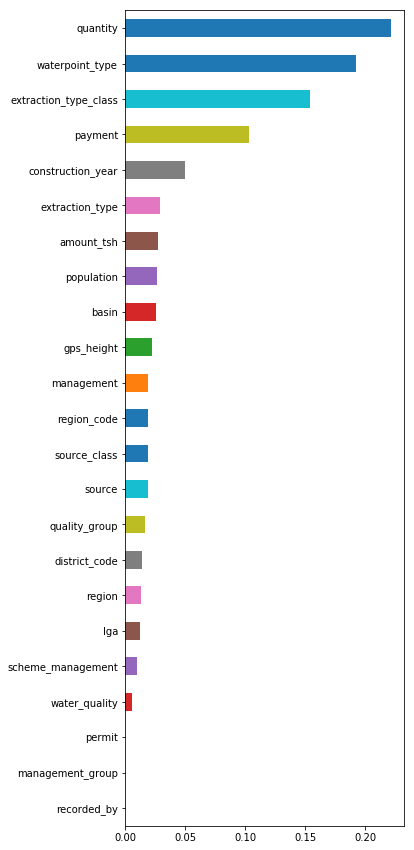

In [314]:
import matplotlib.pyplot as plt

figsize = (5, 15)
plt.figure(figsize=figsize)
importances = pd.Series(best.feature_importances_,X_train.columns).sort_values()
importances.plot.barh()

In [315]:
encoder = ce.OrdinalEncoder()
X_train_val = encoder.fit_transform(X_train_val)
encoder = ce.OrdinalEncoder()
y_train_val = encoder.fit_transform(y_train_val)
#y_train_val

In [288]:
# assert (X_train == X_train.shape)

# assert (X_train.columns == X_train_val.columns)

In [316]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, cv='prefit', scoring='accuracy', 
                                 n_iter=2, random_state=42)

permuter.fit(X_train, y_train)

ValueError: feature_names mismatch: [u'amount_tsh', u'gps_height', u'basin', u'region', u'region_code', u'district_code', u'lga', u'population', u'recorded_by', u'scheme_management', u'permit', u'construction_year', u'extraction_type', u'extraction_type_class', u'management', u'management_group', u'payment', u'water_quality', u'quality_group', u'quantity', u'source', u'source_class', u'waterpoint_type'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22']
expected extraction_type, region_code, gps_height, recorded_by, construction_year, scheme_management, management, source_class, source, basin, extraction_type_class, waterpoint_type, management_group, lga, district_code, payment, population, region, amount_tsh, quality_group, water_quality, permit, quantity in input data
training data did not have the following fields: f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f22, f21, f20, f18, f19, f12, f13, f10, f11, f16, f17, f14, f15

In [283]:
encoder = ce.OrdinalEncoder()
X_test = encoder.fit_transform(X_test)
X_test.head()

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,population,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type
0,0.0,1996,1,1,21,3,1,321,1,1,1,2012,1,1,1,1,1,1,1,1,1,1,1
1,0.0,1569,2,2,2,2,2,300,1,2,1,2000,2,2,2,2,1,1,1,2,2,2,2
2,0.0,1567,1,3,13,2,3,500,1,2,2,2010,1,1,2,2,1,1,1,2,1,1,1
3,0.0,267,3,4,80,43,4,250,1,2,1,1987,1,1,2,2,2,1,1,3,3,2,1
4,500.0,1260,3,5,10,3,5,60,1,3,1,2000,2,2,3,2,3,1,1,4,2,2,2


In [243]:
encoder = ce.OrdinalEncoder()
X_train_val = encoder.fit_transform(X_train_val)
X_train_val.head()

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,population,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type
34912,0.0,0,1,1,18,6,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
53452,0.0,0,2,2,12,4,2,0,1,1,2,0,1,1,1,1,1,1,1,2,2,2,1
3861,1000.0,1760,3,3,21,3,3,150,1,1,3,2010,2,2,1,1,2,1,1,1,3,2,2
33163,0.0,0,4,4,1,5,4,0,1,1,1,0,3,2,1,1,1,1,1,3,3,2,2
6510,0.0,0,1,5,17,2,5,0,1,2,1,0,1,1,2,1,1,1,1,4,1,1,1


In [244]:
y_pred = best.predict(X_train_val)
y_pred = pd.DataFrame(y_pred)

In [245]:
#pd.Series(y_pred).value_counts()

In [246]:
#  {('functional', 1), 
#  ('non functional', 2), 
#  ('functional needs repair', 3)} 

    
# encoder = ce.OrdinalEncoder(cols=['status_group'])

# y_train_val = encoder.fit_transform(y_train_val['status_group'])
# y_train_val['status_group'].value_counts()

In [247]:
#calculate accuracy for a-la-Kaggle test score 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_val, y_pred)
accuracy

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [248]:
X_test.head()

,amount_tsh,gps_height,basin,region,region_code,district_code,lga,population,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_class,waterpoint_type
0,0.0,1996,1,1,21,3,1,321,1,1,1,2012,1,1,1,1,1,1,1,1,1,1,1
1,0.0,1569,2,2,2,2,2,300,1,2,1,2000,2,2,2,2,1,1,1,2,2,2,2
2,0.0,1567,1,3,13,2,3,500,1,2,2,2010,1,1,2,2,1,1,1,2,1,1,1
3,0.0,267,3,4,80,43,4,250,1,2,1,1987,1,1,2,2,2,1,1,3,3,2,1
4,500.0,1260,3,5,10,3,5,60,1,3,1,2000,2,2,3,2,3,1,1,4,2,2,2


In [249]:
#calculate predictions for submission
y_pred_submission = best.predict(X_test)

In [250]:
sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred_submission
submission = submission.replace({1: 'functional', 2: 'non functional', 3: 'functional needs repair'})
submission.to_csv('day2.csv', index=False)

In [251]:
submission['status_group'].value_counts()

non functional             8166
functional                 6190
functional needs repair       2
Name: status_group, dtype: int64

In [252]:
# #testing Random Forest
# from sklearn.ensemble import RandomForestClassifier


# encoder = ce.OrdinalEncoder()
# X_train = encoder.fit_transform(X_train)
# encoder = ce.OrdinalEncoder()
# y_train = encoder.fit_transform(y_train)

# param_distributions = {

#     'n_estimators': [100, 200],
#     'max_depth': [1, 2]
# }

# search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(n_jobs=-1, random_state=42), 
#     param_distributions=param_distributions, 
#     n_iter=4, 
#     n_jobs=-1, 
#     cv=3, 
#     verbose=10, 
#     return_train_score=True, 
#     random_state=42
# )

# search.fit(X_train, y_train)